Uses a relaxation method to find the electric potential of a rectangular area with given boundary conditions that satisfy Laplaces Equation

In [3]:
import numpy as np
import seaborn as sns

In [43]:
def update(old, new):
    """
    Updates the potential values of a given 2D array and writes them to the given new 2D array
    :param old: 
    :param new: 
    :return: 
    """
    shape = old.shape
    for i in range(1, shape[0] - 1):
        for j in range(1, shape[1] - 1):
            # potential at a given point is average of points around it
            new[i, j] = (old[i - 1, j] + old[i + 1, j] + old[i, j - 1] + old[i, j + 1]) / 4
    return new

def estimate_initial_field(p: np.ndarray) -> np.ndarray:
    """
    estimates the potential field as the average between the boundary conditions in each cardinal direction
    """
    x, y = p.shape
    ans = p.copy()
    for i in range(1, p.shape[0] - 1):
        for j in range(1, p.shape[1] - 1):
            ans[i, j] = (p[i, 0] + p[0, j] + p[i, y-1] + p[x-1, j]) / 4
    return ans

def find_potential(p: np.ndarray, n: int) -> np.array:
    """
    :param n: the number of iterations to run. Higher -> more accurate
    :param p: a 2D array representing the region of space with set values of potential along the boundaries acting as boundary conditions
    :return: the updated potential
    """
    # used for object pooling, so we don't have to make a new array every time
    a = estimate_initial_field(p)
    b = a.copy()
    update_into_a = True
    old, new = b, a
    for _ in range(n):
        old, new = (b, a) if update_into_a else (a, b)
        update(old, new)
        update_into_a = not update_into_a
    return new


def is_change_too_large(old: np.ndarray, new: np.ndarray, accuracy: float) -> bool:
    """
    checks if the potential at any point changed by an amount larger than the given accuracy
    :return: 
    """
    for i in range(1, old.shape[0] - 1):
        for j in range(1, old.shape[1] - 1):
            if abs(old[i, j] - new[i, j]) > accuracy:
                return True
    return False


def find_potential_with_accuracy(p: np.ndarray, accuracy: float) -> np.ndarray:
    # used for object pooling so we don't have to make a new array every time
    a = estimate_initial_field(p)
    b = a.copy()
    old, new = b, a
    update_into_a = True
    
    error_too_large = True
    while error_too_large:
        old, new = (b, a) if update_into_a else (a, b)
        update(old, new)
        update_into_a = not update_into_a
        error_too_large = is_change_too_large(old, new, accuracy)
    return new

[[1 2 3 4 5 6 7 8 9]
 [0 0 2 2 4 4 6 7 9]
 [0 0 1 2 3 4 5 7 9]
 [0 0 2 2 4 4 6 7 9]
 [1 2 3 4 5 6 7 8 9]]


<Axes: >

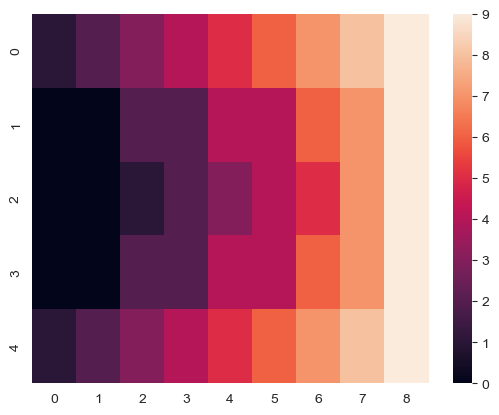

In [46]:
v = np.array([
    [1, 2, 3, 4, 5, 6, 7, 8, 9],
    [0, 0, 0, 0, 0, 0, 0, 0, 9],
    [0, 0, 0, 0, 0, 0, 0, 0, 9],
    [0, 0, 0, 0, 0, 0, 0, 0, 9],
    [1, 2, 3, 4, 5, 6, 7, 8, 9],
])

p = find_potential(v, 100)
print(p)
sns.heatmap(p)